In [2]:
#dependencies numpy pandas matplotlib for data analysis cleaning and plotting
import numpy
from numpy import newaxis
import matplotlib.pyplot as plt
import pandas as pd  
import math as m
from pandas import read_csv

In [3]:
# fix random seed for reproducibility
numpy.random.seed(7)
dataframe = read_csv('TCS111.csv', sep=",")
# dropping the null values is giving better result that filling it with the mean values
dataframe1=dataframe.dropna()
dataframe1.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,04-04-2013,1540.099976,1540.099976,1501.000000,1507.800049,1383.489258,563169
1,05-04-2013,1505.000000,1509.349976,1484.099976,1498.349976,1374.818481,932624
2,08-04-2013,1498.900024,1498.900024,1475.000000,1480.750000,1358.669434,448208
3,09-04-2013,1480.000000,1513.000000,1477.599976,1497.400024,1373.946655,836177
4,10-04-2013,1509.900024,1538.900024,1501.000000,1530.449951,1404.271729,1023142


In [4]:
#technical indicators

#Moving Average -20 days,-30 days
def MA(df, n):  
    MA = pd.Series(pd.rolling_mean(df['Close'], n), name = 'MA_' + str(n))  
    df = df.join(MA)  
    return df



In [5]:

#Exponential Moving Average  
def EMA(df, n):  
    EMA = pd.Series(pd.ewma(df['Close'], span = n, min_periods = n - 1), name = 'EMA_' + str(n))  
    df = df.join(EMA)  
    return df

In [6]:
#Stochastic oscillator %K  
def STOK(df):  
    SOk = pd.Series((df['Close'] - df['Low']) / (df['High'] - df['Low']), name = 'SO%k')  
    df = df.join(SOk)  
    return df

In [7]:
#Average Directional Movement Index  
def ADX(df, n, n_ADX):  
    i = 0  
    UpI = []  
    DoI = []  
    while i + 1 <= df.index[-1]:  
        UpMove = df.get_value(i + 1, 'High') - df.get_value(i, 'High')  
        DoMove = df.get_value(i, 'Low') - df.get_value(i + 1, 'Low')  
        if UpMove > DoMove and UpMove > 0:  
            UpD = UpMove  
        else: UpD = 0  
        UpI.append(UpD)  
        if DoMove > UpMove and DoMove > 0:  
            DoD = DoMove  
        else: DoD = 0  
        DoI.append(DoD)  
        i = i + 1  
    i = 0  
    TR_l = [0]  
    while i < df.index[-1]:  
        TR = max(df.get_value(i + 1, 'High'), df.get_value(i, 'Close')) - min(df.get_value(i + 1, 'Low'), df.get_value(i, 'Close'))  
        TR_l.append(TR)  
        i = i + 1  
    TR_s = pd.Series(TR_l)  
    ATR = pd.Series(pd.ewma(TR_s, span = n, min_periods = n))  
    UpI = pd.Series(UpI)  
    DoI = pd.Series(DoI)  
    PosDI = pd.Series(pd.ewma(UpI, span = n, min_periods = n - 1) / ATR)  
    NegDI = pd.Series(pd.ewma(DoI, span = n, min_periods = n - 1) / ATR)  
    ADX = pd.Series(pd.ewma(abs(PosDI - NegDI) / (PosDI + NegDI), span = n_ADX, min_periods = n_ADX - 1), name = 'ADX_' + str(n) + '_' + str(n_ADX))  
    df = df.join(ADX)  
    return df


In [8]:
#Relative Strength Index  
def RSI(df, n):  
    i = 0  
    UpI = [0]  
    DoI = [0]  
    while i + 1 <= df.index[-1]:  
        UpMove = df.get_value(i + 1, 'High') - df.get_value(i, 'High')  
        DoMove = df.get_value(i, 'Low') - df.get_value(i + 1, 'Low')  
        if UpMove > DoMove and UpMove > 0:  
            UpD = UpMove  
        else: UpD = 0  
        UpI.append(UpD)  
        if DoMove > UpMove and DoMove > 0:  
            DoD = DoMove  
        else: DoD = 0  
        DoI.append(DoD)  
        i = i + 1  
    UpI = pd.Series(UpI)  
    DoI = pd.Series(DoI)  
    PosDI = pd.Series(pd.ewma(UpI, span = n, min_periods = n - 1))  
    NegDI = pd.Series(pd.ewma(DoI, span = n, min_periods = n - 1))  
    RSI = pd.Series(PosDI / (PosDI + NegDI), name = 'RSI_' + str(n))  
    df = df.join(RSI)  
    return df

In [9]:

#Chaikin Oscillator  
def Chaikin(df):  
    ad = (2 * df['Close'] - df['High'] - df['Low']) / (df['High'] - df['Low']) * df['Volume']  
    Chaikin = pd.Series(pd.ewma(ad, span = 3, min_periods = 2) - pd.ewma(ad, span = 10, min_periods = 9), name = 'Chaikin')  
    df = df.join(Chaikin)  
    return df

In [10]:

#Commodity Channel Index  
def CCI(df, n):  
    PP = (df['High'] + df['Low'] + df['Close']) / 3  
    CCI = pd.Series((PP - pd.rolling_mean(PP, n)) / pd.rolling_std(PP, n), name = 'CCI_' + str(n))  
    df = df.join(CCI)  
    return df

In [11]:
#Momentum  
def MOM(df, n):  
    M = pd.Series(df['Close'].diff(n), name = 'Momentum_' + str(n))  
    df = df.join(M)  
    return df


In [12]:

#Rate of Change  
def ROC(df, n):  
    M = df['Close'].diff(n - 1)  
    N = df['Close'].shift(n - 1)  
    ROC = pd.Series(M / N, name = 'ROC_' + str(n))  
    df = df.join(ROC)  
    return df


In [13]:

#Average True Range  
def ATR(df, n):  
    i = 0  
    TR_l = [0]  
    while i < df.index[-1]:  
        TR = max(df.get_value(i + 1, 'High'), df.get_value(i, 'Close')) - min(df.get_value(i + 1, 'Low'), df.get_value(i, 'Close'))  
        TR_l.append(TR)  
        i = i + 1  
    TR_s = pd.Series(TR_l)  
    ATR = pd.Series(pd.ewma(TR_s, span = n, min_periods = n), name = 'ATR_' + str(n))  
    df = df.join(ATR)  
    return df


In [14]:
#Bollinger Bands  
def BBANDS(df, n):  
    MA = pd.Series(pd.rolling_mean(df['Close'], n))  
    MSD = pd.Series(pd.rolling_std(df['Close'], n))  
    b1 = 4 * MSD / MA  
    B1 = pd.Series(b1, name = 'BollingerB_' + str(n))  
    df = df.join(B1)  
    b2 = (df['Close'] - MA + 2 * MSD) / (4 * MSD)  
    B2 = pd.Series(b2, name = 'Bollinger%b_' + str(n))  
    df = df.join(B2)  
    return df


In [15]:

#Trix  
def TRIX(df, n):  
    EX1 = pd.ewma(df['Close'], span = n, min_periods = n - 1)  
    EX2 = pd.ewma(EX1, span = n, min_periods = n - 1)  
    EX3 = pd.ewma(EX2, span = n, min_periods = n - 1)  
    i = 0  
    ROC_l = [0]  
    while i + 1 <= df.index[-1]:  
        ROC = (EX3[i + 1] - EX3[i]) / EX3[i]  
        ROC_l.append(ROC)  
        i = i + 1  
    Trix = pd.Series(ROC_l, name = 'Trix_' + str(n))  
    df = df.join(Trix)  
    return df

In [16]:
#Ultimate Oscillator  
def ULTOSC(df):  
    i = 0  
    TR_l = [0]  
    BP_l = [0]  
    while i < df.index[-1]:  
        TR = max(df.get_value(i + 1, 'High'), df.get_value(i, 'Close')) - min(df.get_value(i + 1, 'Low'), df.get_value(i, 'Close'))  
        TR_l.append(TR)  
        BP = df.get_value(i + 1, 'Close') - min(df.get_value(i + 1, 'Low'), df.get_value(i, 'Close'))  
        BP_l.append(BP)  
        i = i + 1  
    UltO = pd.Series((4 * pd.rolling_sum(pd.Series(BP_l), 7) / pd.rolling_sum(pd.Series(TR_l), 7)) + (2 * pd.rolling_sum(pd.Series(BP_l), 14) / pd.rolling_sum(pd.Series(TR_l), 14)) + (pd.rolling_sum(pd.Series(BP_l), 28) / pd.rolling_sum(pd.Series(TR_l), 28)), name = 'Ultimate_Osc')  
    df = df.join(UltO)  
    return df


In [17]:
#Average Directional Movement Index  
def ADX(df, n, n_ADX):  
    i = 0  
    UpI = []  
    DoI = []  
    while i + 1 <= df.index[-1]:  
        UpMove = df.get_value(i + 1, 'High') - df.get_value(i, 'High')  
        DoMove = df.get_value(i, 'Low') - df.get_value(i + 1, 'Low')  
        if UpMove > DoMove and UpMove > 0:  
            UpD = UpMove  
        else: UpD = 0  
        UpI.append(UpD)  
        if DoMove > UpMove and DoMove > 0:  
            DoD = DoMove  
        else: DoD = 0  
        DoI.append(DoD)  
        i = i + 1  
    i = 0  
    TR_l = [0]  
    while i < df.index[-1]:  
        TR = max(df.get_value(i + 1, 'High'), df.get_value(i, 'Close')) - min(df.get_value(i + 1, 'Low'), df.get_value(i, 'Close'))  
        TR_l.append(TR)  
        i = i + 1  
    TR_s = pd.Series(TR_l)  
    ATR = pd.Series(pd.ewma(TR_s, span = n, min_periods = n))  
    UpI = pd.Series(UpI)  
    DoI = pd.Series(DoI)  
    PosDI = pd.Series(pd.ewma(UpI, span = n, min_periods = n - 1) / ATR)  
    NegDI = pd.Series(pd.ewma(DoI, span = n, min_periods = n - 1) / ATR)  
    ADX = pd.Series(pd.ewma(abs(PosDI - NegDI) / (PosDI + NegDI), span = n_ADX, min_periods = n_ADX - 1), name = 'ADX_' + str(n) + '_' + str(n_ADX))  
    df = df.join(ADX)  
    return df


In [18]:
#Mass Index  
def MassI(df):  
    Range = df['High'] - df['Low']  
    EX1 = pd.ewma(Range, span = 9, min_periods = 8)  
    EX2 = pd.ewma(EX1, span = 9, min_periods = 8)  
    Mass = EX1 / EX2  
    MassI = pd.Series(pd.rolling_sum(Mass, 25), name = 'Mass Index')  
    df = df.join(MassI)  
    return df


In [19]:

#MACD, MACD Signal and MACD difference  
def MACD(df, n_fast, n_slow):  
    EMAfast = pd.Series(pd.ewma(df['Close'], span = n_fast, min_periods = n_slow - 1))  
    EMAslow = pd.Series(pd.ewma(df['Close'], span = n_slow, min_periods = n_slow - 1))  
    MACD = pd.Series(EMAfast - EMAslow, name = 'MACD_' + str(n_fast) + '_' + str(n_slow))  
    MACDsign = pd.Series(pd.ewma(MACD, span = 9, min_periods = 8), name = 'MACDsign_' + str(n_fast) + '_' + str(n_slow))  
    MACDdiff = pd.Series(MACD - MACDsign, name = 'MACDdiff_' + str(n_fast) + '_' + str(n_slow))  
    df = df.join(MACD)  
    df = df.join(MACDsign)  
    df = df.join(MACDdiff)  
    return df

In [20]:
#Vortex Indicator
def Vortex(df, n):  
    i = 0  
    TR = [0]  
    while i < df.index[-1]:  
        Range = max(df.get_value(i + 1, 'High'), df.get_value(i, 'Close')) - min(df.get_value(i + 1, 'Low'), df.get_value(i, 'Close'))  
        TR.append(Range)  
        i = i + 1  
    i = 0  
    VM = [0]  
    while i < df.index[-1]:  
        Range = abs(df.get_value(i + 1, 'High') - df.get_value(i, 'Low')) - abs(df.get_value(i + 1, 'Low') - df.get_value(i, 'High'))  
        VM.append(Range)  
        i = i + 1  
    VI = pd.Series(pd.rolling_sum(pd.Series(VM), n) / pd.rolling_sum(pd.Series(TR), n), name = 'Vortex_' + str(n))  
    df = df.join(VI)  
    return df



In [21]:
#True Strength Index  
def TSI(df, r, s):  
    M = pd.Series(df['Close'].diff(1))  
    aM = abs(M)  
    EMA1 = pd.Series(pd.ewma(M, span = r, min_periods = r - 1))  
    aEMA1 = pd.Series(pd.ewma(aM, span = r, min_periods = r - 1))  
    EMA2 = pd.Series(pd.ewma(EMA1, span = s, min_periods = s - 1))  
    aEMA2 = pd.Series(pd.ewma(aEMA1, span = s, min_periods = s - 1))  
    TSI = pd.Series(EMA2 / aEMA2, name = 'TSI_' + str(r) + '_' + str(s))  
    df = df.join(TSI)  
    return df


In [22]:
#Accumulation/Distribution  
def ACCDIST(df, n):  
    ad = (2 * df['Close'] - df['High'] - df['Low']) / (df['High'] - df['Low']) * df['Volume']  
    M = ad.diff(n - 1)  
    N = ad.shift(n - 1)  
    ROC = M / N  
    AD = pd.Series(ROC, name = 'Acc/Dist_ROC_' + str(n))  
    df = df.join(AD)  
    return df


In [23]:
#Standard Deviation  
def STDDEV(df, n):  
    df = df.join(pd.Series(pd.rolling_std(df['Close'], n), name = 'STD_' + str(n)))  
    return df  

In [24]:
dataframe1=MA(dataframe1,30)
dataframe1.tail()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=30).mean()
  """


,Date,Open,High,Low,Close,Adj Close,Volume,MA_30
1227,27-03-2018,2825.000000,2863.000000,2823.050049,2847.699951,2847.699951,1247287,2950.788346
1228,28-03-2018,2835.899902,2875.000000,2825.000000,2849.149902,2849.149902,3432827,2946.850008
1229,02-04-2018,2849.149902,2914.000000,2840.000000,2909.649902,2909.649902,831494,2946.778337
1230,03-04-2018,2892.100098,2929.899902,2892.100098,2911.250000,2911.250000,968645,2946.291667
1231,04-04-2018,2929.449951,2934.000000,2892.000000,2910.899902,2910.899902,1420910,2945.553328


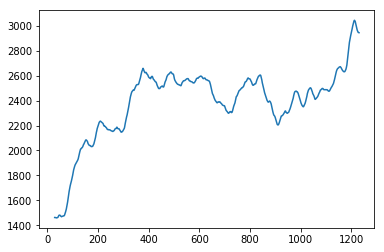

In [25]:
y=dataframe1['MA_30']
plt.plot(y)
plt.show()

In [26]:
dataframe1=EMA(dataframe1,30)
dataframe1.tail()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(ignore_na=False,span=30,min_periods=29,adjust=True).mean()
  after removing the cwd from sys.path.


,Date,Open,High,Low,Close,Adj Close,Volume,MA_30,EMA_30
1227,27-03-2018,2825.000000,2863.000000,2823.050049,2847.699951,2847.699951,1247287,2950.788346,2919.037542
1228,28-03-2018,2835.899902,2875.000000,2825.000000,2849.149902,2849.149902,3432827,2946.850008,2914.528662
1229,02-04-2018,2849.149902,2914.000000,2840.000000,2909.649902,2909.649902,831494,2946.778337,2914.213903
1230,03-04-2018,2892.100098,2929.899902,2892.100098,2911.250000,2911.250000,968645,2946.291667,2914.022683
1231,04-04-2018,2929.449951,2934.000000,2892.000000,2910.899902,2910.899902,1420910,2945.553328,2913.821214


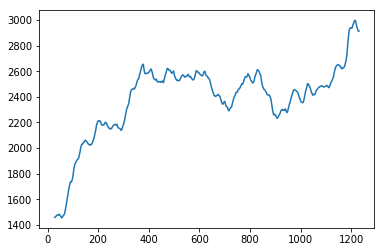

In [27]:
y=dataframe1['EMA_30']
plt.plot(y)
plt.show()

In [28]:
dataframe1=STOK(dataframe1)
dataframe1.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,MA_30,EMA_30,SO%k
1227,27-03-2018,2825.000000,2863.000000,2823.050049,2847.699951,2847.699951,1247287,2950.788346,2919.037542,0.617020
1228,28-03-2018,2835.899902,2875.000000,2825.000000,2849.149902,2849.149902,3432827,2946.850008,2914.528662,0.482998
1229,02-04-2018,2849.149902,2914.000000,2840.000000,2909.649902,2909.649902,831494,2946.778337,2914.213903,0.941215
1230,03-04-2018,2892.100098,2929.899902,2892.100098,2911.250000,2911.250000,968645,2946.291667,2914.022683,0.506614
1231,04-04-2018,2929.449951,2934.000000,2892.000000,2910.899902,2910.899902,1420910,2945.553328,2913.821214,0.449998


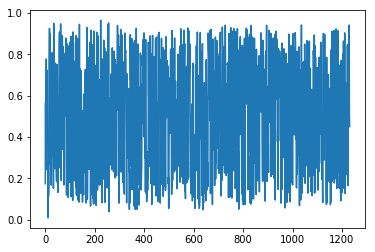

In [29]:
y=dataframe1['SO%k']
plt.plot(y)
plt.show()

In [30]:
dataframe1=ADX(dataframe1, 30, 30)
dataframe1.tail()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  import sys
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:8: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:21: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:25: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(ignore_na=False,span=30,min_periods=30,adjust=True).mean()
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:28: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	

,Date,Open,High,Low,Close,Adj Close,Volume,MA_30,EMA_30,SO%k,ADX_30_30
1227,27-03-2018,2825.000000,2863.000000,2823.050049,2847.699951,2847.699951,1247287,2950.788346,2919.037542,0.617020,0.232564
1228,28-03-2018,2835.899902,2875.000000,2825.000000,2849.149902,2849.149902,3432827,2946.850008,2914.528662,0.482998,0.222045
1229,02-04-2018,2849.149902,2914.000000,2840.000000,2909.649902,2909.649902,831494,2946.778337,2914.213903,0.941215,0.209646
1230,03-04-2018,2892.100098,2929.899902,2892.100098,2911.250000,2911.250000,968645,2946.291667,2914.022683,0.506614,0.197375
1231,04-04-2018,2929.449951,2934.000000,2892.000000,2910.899902,2910.899902,1420910,2945.553328,2913.821214,0.449998,0.197375


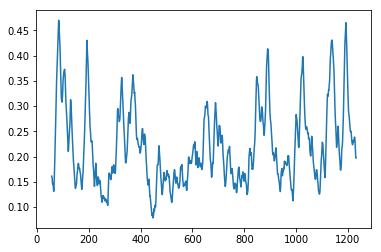

In [31]:
y=dataframe1['ADX_30_30']
plt.plot(y)
plt.show()

In [32]:
dataframe1=Chaikin(dataframe1)
dataframe1.tail()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(ignore_na=False,span=3,min_periods=2,adjust=True).mean()
  """
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(ignore_na=False,span=10,min_periods=9,adjust=True).mean()
  """


,Date,Open,High,Low,Close,Adj Close,Volume,MA_30,EMA_30,SO%k,ADX_30_30,Chaikin
1227,27-03-2018,2825.000000,2863.000000,2823.050049,2847.699951,2847.699951,1247287,2950.788346,2919.037542,0.617020,0.232564,921476.910037
1228,28-03-2018,2835.899902,2875.000000,2825.000000,2849.149902,2849.149902,3432827,2946.850008,2914.528662,0.482998,0.222045,625041.520702
1229,02-04-2018,2849.149902,2914.000000,2840.000000,2909.649902,2909.649902,831494,2946.778337,2914.213903,0.941215,0.209646,717552.928512
1230,03-04-2018,2892.100098,2929.899902,2892.100098,2911.250000,2911.250000,968645,2946.291667,2914.022683,0.506614,0.197375,460782.071045
1231,04-04-2018,2929.449951,2934.000000,2892.000000,2910.899902,2910.899902,1420910,2945.553328,2913.821214,0.449998,0.197375,264560.475926


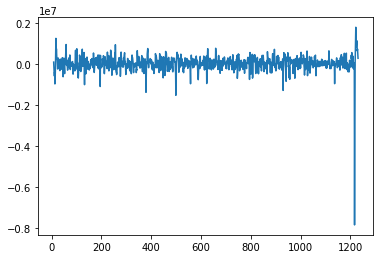

In [33]:
y=dataframe1['Chaikin']
plt.plot(y)
plt.show()

In [34]:
dataframe1=CCI(dataframe1,30)
dataframe1.tail()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=30).mean()
  """
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=30).std()
  """


,Date,Open,High,Low,Close,Adj Close,Volume,MA_30,EMA_30,SO%k,ADX_30_30,Chaikin,CCI_30
1227,27-03-2018,2825.000000,2863.000000,2823.050049,2847.699951,2847.699951,1247287,2950.788346,2919.037542,0.617020,0.232564,921476.910037,-1.201025
1228,28-03-2018,2835.899902,2875.000000,2825.000000,2849.149902,2849.149902,3432827,2946.850008,2914.528662,0.482998,0.222045,625041.520702,-1.075346
1229,02-04-2018,2849.149902,2914.000000,2840.000000,2909.649902,2909.649902,831494,2946.778337,2914.213903,0.941215,0.209646,717552.928512,-0.647127
1230,03-04-2018,2892.100098,2929.899902,2892.100098,2911.250000,2911.250000,968645,2946.291667,2914.022683,0.506614,0.197375,460782.071045,-0.393827
1231,04-04-2018,2929.449951,2934.000000,2892.000000,2910.899902,2910.899902,1420910,2945.553328,2913.821214,0.449998,0.197375,264560.475926,-0.365913


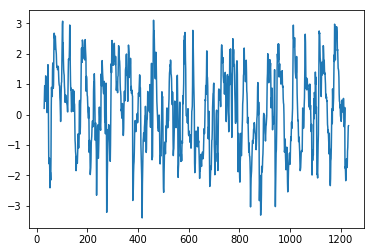

In [35]:
y=dataframe1['CCI_30']
plt.plot(y)
plt.show()

In [36]:
dataframe1=MOM(dataframe1,30)
dataframe1.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,MA_30,EMA_30,SO%k,ADX_30_30,Chaikin,CCI_30,Momentum_30
1227,27-03-2018,2825.000000,2863.000000,2823.050049,2847.699951,2847.699951,1247287,2950.788346,2919.037542,0.617020,0.232564,921476.910037,-1.201025,-124.000000
1228,28-03-2018,2835.899902,2875.000000,2825.000000,2849.149902,2849.149902,3432827,2946.850008,2914.528662,0.482998,0.222045,625041.520702,-1.075346,-118.150147
1229,02-04-2018,2849.149902,2914.000000,2840.000000,2909.649902,2909.649902,831494,2946.778337,2914.213903,0.941215,0.209646,717552.928512,-0.647127,-2.150147
1230,03-04-2018,2892.100098,2929.899902,2892.100098,2911.250000,2911.250000,968645,2946.291667,2914.022683,0.506614,0.197375,460782.071045,-0.393827,-14.600098
1231,04-04-2018,2929.449951,2934.000000,2892.000000,2910.899902,2910.899902,1420910,2945.553328,2913.821214,0.449998,0.197375,264560.475926,-0.365913,-22.150147


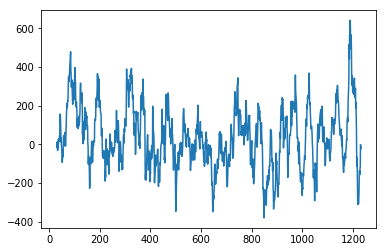

In [37]:
y=dataframe1['Momentum_30']
plt.plot(y)
plt.show()

In [38]:
dataframe1=ROC(dataframe1,30)
dataframe1.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,MA_30,EMA_30,SO%k,ADX_30_30,Chaikin,CCI_30,Momentum_30,ROC_30
1227,27-03-2018,2825.000000,2863.000000,2823.050049,2847.699951,2847.699951,1247287,2950.788346,2919.037542,0.617020,0.232564,921476.910037,-1.201025,-124.000000,-0.040306
1228,28-03-2018,2835.899902,2875.000000,2825.000000,2849.149902,2849.149902,3432827,2946.850008,2914.528662,0.482998,0.222045,625041.520702,-1.075346,-118.150147,-0.021516
1229,02-04-2018,2849.149902,2914.000000,2840.000000,2909.649902,2909.649902,831494,2946.778337,2914.213903,0.941215,0.209646,717552.928512,-0.647127,-2.150147,-0.005537
1230,03-04-2018,2892.100098,2929.899902,2892.100098,2911.250000,2911.250000,968645,2946.291667,2914.022683,0.506614,0.197375,460782.071045,-0.393827,-14.600098,-0.007433
1231,04-04-2018,2929.449951,2934.000000,2892.000000,2910.899902,2910.899902,1420910,2945.553328,2913.821214,0.449998,0.197375,264560.475926,-0.365913,-22.150147,-0.004344


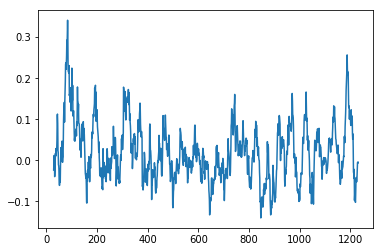

In [39]:
y=dataframe1['ROC_30']
plt.plot(y)
plt.show()

In [40]:
dataframe1=ATR(dataframe1,30)
dataframe1.tail()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  import sys
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:11: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(ignore_na=False,span=30,min_periods=30,adjust=True).mean()
  # This is added back by InteractiveShellApp.init_path()


,Date,Open,High,Low,Close,Adj Close,Volume,MA_30,EMA_30,SO%k,ADX_30_30,Chaikin,CCI_30,Momentum_30,ROC_30,ATR_30
1227,27-03-2018,2825.000000,2863.000000,2823.050049,2847.699951,2847.699951,1247287,2950.788346,2919.037542,0.617020,0.232564,921476.910037,-1.201025,-124.000000,-0.040306,63.197223
1228,28-03-2018,2835.899902,2875.000000,2825.000000,2849.149902,2849.149902,3432827,2946.850008,2914.528662,0.482998,0.222045,625041.520702,-1.075346,-118.150147,-0.021516,62.345789
1229,02-04-2018,2849.149902,2914.000000,2840.000000,2909.649902,2909.649902,831494,2946.778337,2914.213903,0.941215,0.209646,717552.928512,-0.647127,-2.150147,-0.005537,63.097674
1230,03-04-2018,2892.100098,2929.899902,2892.100098,2911.250000,2911.250000,968645,2946.291667,2914.022683,0.506614,0.197375,460782.071045,-0.393827,-14.600098,-0.007433,61.465553
1231,04-04-2018,2929.449951,2934.000000,2892.000000,2910.899902,2910.899902,1420910,2945.553328,2913.821214,0.449998,0.197375,264560.475926,-0.365913,-22.150147,-0.004344,60.209711


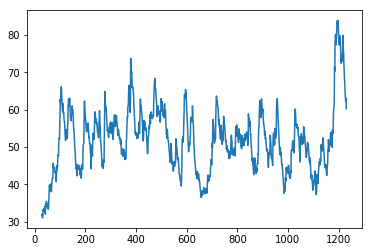

In [41]:
y=dataframe1['ATR_30']
plt.plot(y)
plt.show()

In [42]:
dataframe1=BBANDS(dataframe1,30)
dataframe1.tail()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=30).mean()
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=30).std()
  after removing the cwd from sys.path.


,Date,Open,High,Low,Close,Adj Close,Volume,MA_30,EMA_30,SO%k,ADX_30_30,Chaikin,CCI_30,Momentum_30,ROC_30,ATR_30,BollingerB_30,Bollinger%b_30
1227,27-03-2018,2825.000000,2863.000000,2823.050049,2847.699951,2847.699951,1247287,2950.788346,2919.037542,0.617020,0.232564,921476.910037,-1.201025,-124.000000,-0.040306,63.197223,0.125044,0.220612
1228,28-03-2018,2835.899902,2875.000000,2825.000000,2849.149902,2849.149902,3432827,2946.850008,2914.528662,0.482998,0.222045,625041.520702,-1.075346,-118.150147,-0.021516,62.345789,0.127622,0.240216
1229,02-04-2018,2849.149902,2914.000000,2840.000000,2909.649902,2909.649902,831494,2946.778337,2914.213903,0.941215,0.209646,717552.928512,-0.647127,-2.150147,-0.005537,63.097674,0.127664,0.401306
1230,03-04-2018,2892.100098,2929.899902,2892.100098,2911.250000,2911.250000,968645,2946.291667,2914.022683,0.506614,0.197375,460782.071045,-0.393827,-14.600098,-0.007433,61.465553,0.127888,0.407001
1231,04-04-2018,2929.449951,2934.000000,2892.000000,2910.899902,2910.899902,1420910,2945.553328,2913.821214,0.449998,0.197375,264560.475926,-0.365913,-22.150147,-0.004344,60.209711,0.128183,0.408220


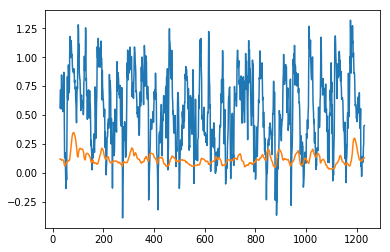

In [43]:
y1=dataframe1['BollingerB_30']
y=dataframe1['Bollinger%b_30']
plt.plot(y)
plt.plot(y1)
plt.show()

In [44]:
dataframe1=TRIX(dataframe1,30)
dataframe1.tail()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(ignore_na=False,span=30,min_periods=29,adjust=True).mean()
  after removing the cwd from sys.path.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(ignore_na=False,span=30,min_periods=29,adjust=True).mean()
  """
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(ignore_na=False,span=30,min_periods=29,adjust=True).mean()
  


,Date,Open,High,Low,Close,Adj Close,Volume,MA_30,EMA_30,SO%k,ADX_30_30,Chaikin,CCI_30,Momentum_30,ROC_30,ATR_30,BollingerB_30,Bollinger%b_30,Trix_30
1227,27-03-2018,2825.000000,2863.000000,2823.050049,2847.699951,2847.699951,1247287,2950.788346,2919.037542,0.617020,0.232564,921476.910037,-1.201025,-124.000000,-0.040306,63.197223,0.125044,0.220612,0.001253
1228,28-03-2018,2835.899902,2875.000000,2825.000000,2849.149902,2849.149902,3432827,2946.850008,2914.528662,0.482998,0.222045,625041.520702,-1.075346,-118.150147,-0.021516,62.345789,0.127622,0.240216,0.001139
1229,02-04-2018,2849.149902,2914.000000,2840.000000,2909.649902,2909.649902,831494,2946.778337,2914.213903,0.941215,0.209646,717552.928512,-0.647127,-2.150147,-0.005537,63.097674,0.127664,0.401306,0.001034
1230,03-04-2018,2892.100098,2929.899902,2892.100098,2911.250000,2911.250000,968645,2946.291667,2914.022683,0.506614,0.197375,460782.071045,-0.393827,-14.600098,-0.007433,61.465553,0.127888,0.407001,0.000938
1231,04-04-2018,2929.449951,2934.000000,2892.000000,2910.899902,2910.899902,1420910,2945.553328,2913.821214,0.449998,0.197375,264560.475926,-0.365913,-22.150147,-0.004344,60.209711,0.128183,0.408220,0.000850


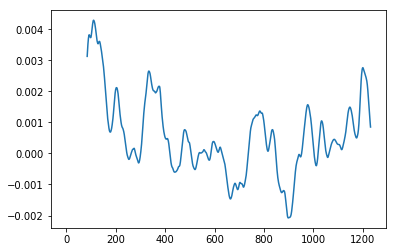

In [45]:
y=dataframe1['Trix_30']
plt.plot(y)
plt.show()

In [46]:
dataframe1=ULTOSC(dataframe1)
dataframe1.tail()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  import sys
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:9: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:12: FutureWarning: pd.rolling_sum is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=7).sum()
  if sys.path[0] == '':
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:12: FutureWarning: pd.rolling_sum is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=14).sum()
  if sys.path[0] == '':
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:12: FutureWarning: pd.rolling_

,Date,Open,High,Low,Close,Adj Close,Volume,MA_30,EMA_30,SO%k,ADX_30_30,Chaikin,CCI_30,Momentum_30,ROC_30,ATR_30,BollingerB_30,Bollinger%b_30,Trix_30,Ultimate_Osc
1227,27-03-2018,2825.000000,2863.000000,2823.050049,2847.699951,2847.699951,1247287,2950.788346,2919.037542,0.617020,0.232564,921476.910037,-1.201025,-124.000000,-0.040306,63.197223,0.125044,0.220612,0.001253,3.286299
1228,28-03-2018,2835.899902,2875.000000,2825.000000,2849.149902,2849.149902,3432827,2946.850008,2914.528662,0.482998,0.222045,625041.520702,-1.075346,-118.150147,-0.021516,62.345789,0.127622,0.240216,0.001139,3.337497
1229,02-04-2018,2849.149902,2914.000000,2840.000000,2909.649902,2909.649902,831494,2946.778337,2914.213903,0.941215,0.209646,717552.928512,-0.647127,-2.150147,-0.005537,63.097674,0.127664,0.401306,0.001034,3.568891
1230,03-04-2018,2892.100098,2929.899902,2892.100098,2911.250000,2911.250000,968645,2946.291667,2914.022683,0.506614,0.197375,460782.071045,-0.393827,-14.600098,-0.007433,61.465553,0.127888,0.407001,0.000938,3.704836
1231,04-04-2018,2929.449951,2934.000000,2892.000000,2910.899902,2910.899902,1420910,2945.553328,2913.821214,0.449998,0.197375,264560.475926,-0.365913,-22.150147,-0.004344,60.209711,0.128183,0.408220,0.000850,4.098986


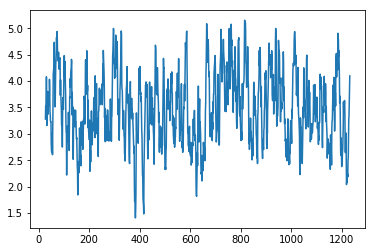

In [47]:
y=dataframe1['Ultimate_Osc']
plt.plot(y)
plt.show()

In [48]:
dataframe1=MassI(dataframe1)
dataframe1.tail()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(ignore_na=False,span=9,min_periods=8,adjust=True).mean()
  after removing the cwd from sys.path.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(ignore_na=False,span=9,min_periods=8,adjust=True).mean()
  """
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: FutureWarning: pd.rolling_sum is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=25).sum()
  import sys


,Date,Open,High,Low,Close,Adj Close,Volume,MA_30,EMA_30,SO%k,...,Chaikin,CCI_30,Momentum_30,ROC_30,ATR_30,BollingerB_30,Bollinger%b_30,Trix_30,Ultimate_Osc,Mass Index
1227,27-03-2018,2825.000000,2863.000000,2823.050049,2847.699951,2847.699951,1247287,2950.788346,2919.037542,0.617020,...,921476.910037,-1.201025,-124.000000,-0.040306,63.197223,0.125044,0.220612,0.001253,3.286299,23.256977
1228,28-03-2018,2835.899902,2875.000000,2825.000000,2849.149902,2849.149902,3432827,2946.850008,2914.528662,0.482998,...,625041.520702,-1.075346,-118.150147,-0.021516,62.345789,0.127622,0.240216,0.001139,3.337497,23.291168
1229,02-04-2018,2849.149902,2914.000000,2840.000000,2909.649902,2909.649902,831494,2946.778337,2914.213903,0.941215,...,717552.928512,-0.647127,-2.150147,-0.005537,63.097674,0.127664,0.401306,0.001034,3.568891,23.334013
1230,03-04-2018,2892.100098,2929.899902,2892.100098,2911.250000,2911.250000,968645,2946.291667,2914.022683,0.506614,...,460782.071045,-0.393827,-14.600098,-0.007433,61.465553,0.127888,0.407001,0.000938,3.704836,23.363147
1231,04-04-2018,2929.449951,2934.000000,2892.000000,2910.899902,2910.899902,1420910,2945.553328,2913.821214,0.449998,...,264560.475926,-0.365913,-22.150147,-0.004344,60.209711,0.128183,0.408220,0.000850,4.098986,23.310184


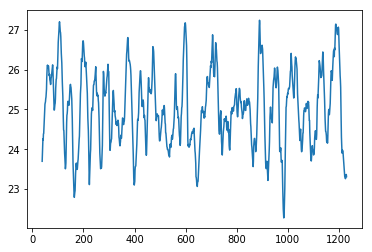

In [49]:
y=dataframe1['Mass Index']
plt.plot(y)
plt.show()

In [50]:
dataframe1=Vortex(dataframe1,30)
dataframe1.tail()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:12: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if sys.path[0] == '':
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:15: FutureWarning: pd.rolling_sum is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=30).sum()
  from ipykernel import kernelapp as app


,Date,Open,High,Low,Close,Adj Close,Volume,MA_30,EMA_30,SO%k,...,CCI_30,Momentum_30,ROC_30,ATR_30,BollingerB_30,Bollinger%b_30,Trix_30,Ultimate_Osc,Mass Index,Vortex_30
1227,27-03-2018,2825.000000,2863.000000,2823.050049,2847.699951,2847.699951,1247287,2950.788346,2919.037542,0.617020,...,-1.201025,-124.000000,-0.040306,63.197223,0.125044,0.220612,0.001253,3.286299,23.256977,-0.006682
1228,28-03-2018,2835.899902,2875.000000,2825.000000,2849.149902,2849.149902,3432827,2946.850008,2914.528662,0.482998,...,-1.075346,-118.150147,-0.021516,62.345789,0.127622,0.240216,0.001139,3.337497,23.291168,-0.045287
1229,02-04-2018,2849.149902,2914.000000,2840.000000,2909.649902,2909.649902,831494,2946.778337,2914.213903,0.941215,...,-0.647127,-2.150147,-0.005537,63.097674,0.127664,0.401306,0.001034,3.568891,23.334013,0.040969
1230,03-04-2018,2892.100098,2929.899902,2892.100098,2911.250000,2911.250000,968645,2946.291667,2914.022683,0.506614,...,-0.393827,-14.600098,-0.007433,61.465553,0.127888,0.407001,0.000938,3.704836,23.363147,0.086214
1231,04-04-2018,2929.449951,2934.000000,2892.000000,2910.899902,2910.899902,1420910,2945.553328,2913.821214,0.449998,...,-0.365913,-22.150147,-0.004344,60.209711,0.128183,0.408220,0.000850,4.098986,23.310184,0.050397


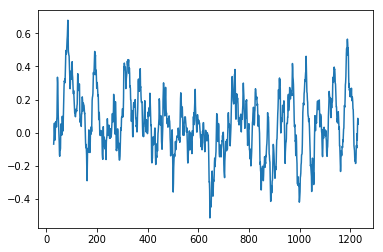

In [51]:
y=dataframe1['Vortex_30']
plt.plot(y)
plt.show()

In [52]:
dataframe1=ACCDIST(dataframe1,30)
dataframe1.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,MA_30,EMA_30,SO%k,...,Momentum_30,ROC_30,ATR_30,BollingerB_30,Bollinger%b_30,Trix_30,Ultimate_Osc,Mass Index,Vortex_30,Acc/Dist_ROC_30
1227,27-03-2018,2825.000000,2863.000000,2823.050049,2847.699951,2847.699951,1247287,2950.788346,2919.037542,0.617020,...,-124.000000,-0.040306,63.197223,0.125044,0.220612,0.001253,3.286299,23.256977,-0.006682,-1.452522
1228,28-03-2018,2835.899902,2875.000000,2825.000000,2849.149902,2849.149902,3432827,2946.850008,2914.528662,0.482998,...,-118.150147,-0.021516,62.345789,0.127622,0.240216,0.001139,3.337497,23.291168,-0.045287,-0.845010
1229,02-04-2018,2849.149902,2914.000000,2840.000000,2909.649902,2909.649902,831494,2946.778337,2914.213903,0.941215,...,-2.150147,-0.005537,63.097674,0.127664,0.401306,0.001034,3.568891,23.334013,0.040969,5.266637
1230,03-04-2018,2892.100098,2929.899902,2892.100098,2911.250000,2911.250000,968645,2946.291667,2914.022683,0.506614,...,-14.600098,-0.007433,61.465553,0.127888,0.407001,0.000938,3.704836,23.363147,0.086214,-1.013810
1231,04-04-2018,2929.449951,2934.000000,2892.000000,2910.899902,2910.899902,1420910,2945.553328,2913.821214,0.449998,...,-22.150147,-0.004344,60.209711,0.128183,0.408220,0.000850,4.098986,23.310184,0.050397,7.100424


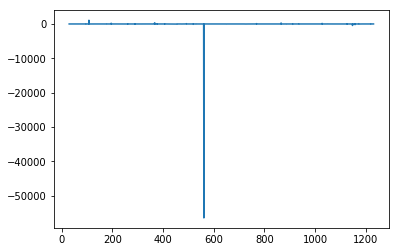

In [53]:
y=dataframe1['Acc/Dist_ROC_30']
plt.plot(y)
plt.show()


In [54]:
dataframe1=STDDEV(dataframe1,30)
dataframe1.tail()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=30).std()
  This is separate from the ipykernel package so we can avoid doing imports until


,Date,Open,High,Low,Close,Adj Close,Volume,MA_30,EMA_30,SO%k,...,ROC_30,ATR_30,BollingerB_30,Bollinger%b_30,Trix_30,Ultimate_Osc,Mass Index,Vortex_30,Acc/Dist_ROC_30,STD_30
1227,27-03-2018,2825.000000,2863.000000,2823.050049,2847.699951,2847.699951,1247287,2950.788346,2919.037542,0.617020,...,-0.040306,63.197223,0.125044,0.220612,0.001253,3.286299,23.256977,-0.006682,-1.452522,92.244766
1228,28-03-2018,2835.899902,2875.000000,2825.000000,2849.149902,2849.149902,3432827,2946.850008,2914.528662,0.482998,...,-0.021516,62.345789,0.127622,0.240216,0.001139,3.337497,23.291168,-0.045287,-0.845010,94.020583
1229,02-04-2018,2849.149902,2914.000000,2840.000000,2909.649902,2909.649902,831494,2946.778337,2914.213903,0.941215,...,-0.005537,63.097674,0.127664,0.401306,0.001034,3.568891,23.334013,0.040969,5.266637,94.049038
1230,03-04-2018,2892.100098,2929.899902,2892.100098,2911.250000,2911.250000,968645,2946.291667,2914.022683,0.506614,...,-0.007433,61.465553,0.127888,0.407001,0.000938,3.704836,23.363147,0.086214,-1.013810,94.198725
1231,04-04-2018,2929.449951,2934.000000,2892.000000,2910.899902,2910.899902,1420910,2945.553328,2913.821214,0.449998,...,-0.004344,60.209711,0.128183,0.408220,0.000850,4.098986,23.310184,0.050397,7.100424,94.392700


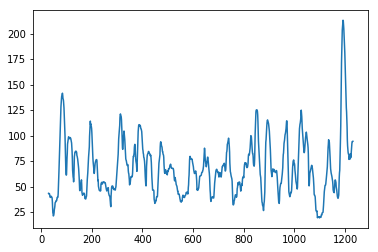

In [55]:
y=dataframe1['STD_30']
plt.plot(y)
plt.show()

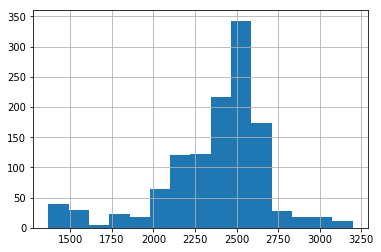

In [56]:
dataframe1['Close'].hist(bins=15)

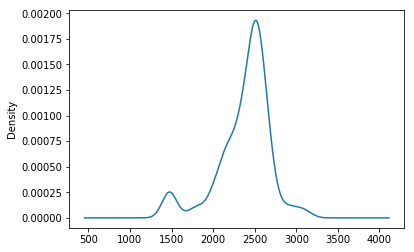

In [57]:
dataframe1['Close'].plot.kde()

In [58]:
dataframe1['close']=dataframe1['Close']
dataframe1.head()

,Date,Open,High,Low,Close,Adj Close,Volume,MA_30,EMA_30,SO%k,...,ATR_30,BollingerB_30,Bollinger%b_30,Trix_30,Ultimate_Osc,Mass Index,Vortex_30,Acc/Dist_ROC_30,STD_30,close
0,04-04-2013,1540.099976,1540.099976,1501.000000,1507.800049,1383.489258,563169,NaN,NaN,0.173914,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,1507.800049
1,05-04-2013,1505.000000,1509.349976,1484.099976,1498.349976,1374.818481,932624,NaN,NaN,0.564356,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1498.349976
2,08-04-2013,1498.900024,1498.900024,1475.000000,1480.750000,1358.669434,448208,NaN,NaN,0.240586,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1480.750000
3,09-04-2013,1480.000000,1513.000000,1477.599976,1497.400024,1373.946655,836177,NaN,NaN,0.559323,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1497.400024
4,10-04-2013,1509.900024,1538.900024,1501.000000,1530.449951,1404.271729,1023142,NaN,NaN,0.777043,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1530.449951


In [61]:
corr = dataframe1.select_dtypes(include = ['float64', 'int64']).iloc[:, 1:].corr()
plt.figure(figsize=(12, 12))


In [62]:
cor_dict = corr['close'].to_dict()
del cor_dict['close']
print("List the numerical features decendingly by their correlation with Sale Price:\n")
for ele in sorted(cor_dict.items(), key = lambda x: -abs(x[1])):
    print("{0}: \t{1}".format(*ele))

List the numerical features decendingly by their correlation with Sale Price:

Close: 	1.0
High: 	0.9981565600280223
Low: 	0.9980248286550116
Adj Close: 	0.9905398237143737
EMA_30: 	0.9632891208020047
MA_30: 	0.9479990941877477
ATR_30: 	0.4485565051987509
STD_30: 	0.23985755892428473
Momentum_30: 	0.1255025714624544
CCI_30: 	0.11779931179211824
Bollinger%b_30: 	0.11777914988794316
BollingerB_30: 	-0.10355237396259481
Vortex_30: 	0.09685698061872655
Trix_30: 	-0.06318738587520989
Mass Index: 	-0.04145872585801369
ADX_30_30: 	0.03053350897218641
ROC_30: 	0.03021542665378223
Ultimate_Osc: 	0.022582856921164334
SO%k: 	0.020999109863811826
Volume: 	-0.01945821431148854
Acc/Dist_ROC_30: 	-0.015191863033791999
Chaikin: 	0.004268454153793864


# we can see that on few indicators have correlation with the closing price
# we will use only these as features to predict

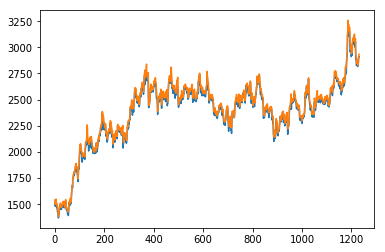

In [91]:
X1=dataframe1['close']
X2=dataframe1['High']
X3=dataframe1['Low']
X4=dataframe1['EMA_30']
X5=dataframe1['MA_30']
X6=dataframe1['ATR_30']
X7=dataframe1['Momentum_30']
X8=dataframe1['CCI_30']
X9=dataframe1['Bollinger%b_30']
X10=dataframe1['STD_30']

plt.plot(X1)
plt.plot(X2)
plt.show()

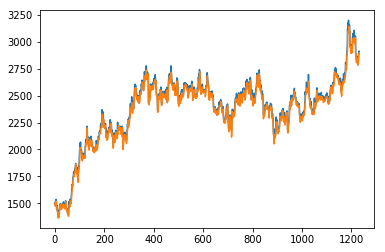

In [92]:
plt.plot(X1)
plt.plot(X3)
plt.show()

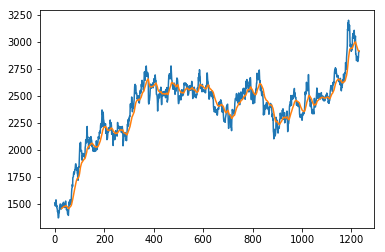

In [93]:
plt.plot(X1)
plt.plot(X4)
plt.show()

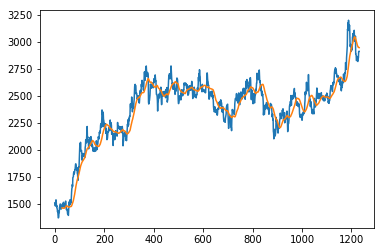

In [94]:
plt.plot(X1)
plt.plot(X5)
plt.show()

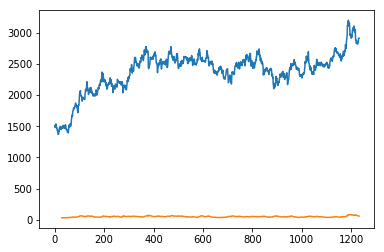

In [95]:
plt.plot(X1)
plt.plot(X6)
plt.show()

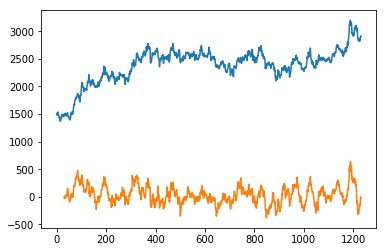

In [96]:
plt.plot(X1)
plt.plot(X7)
plt.show()

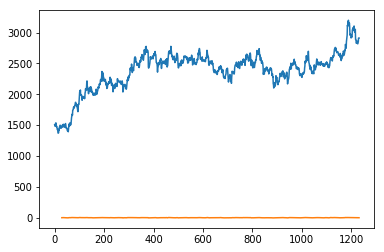

In [99]:
plt.plot(X1)
plt.plot(X8)
plt.show()

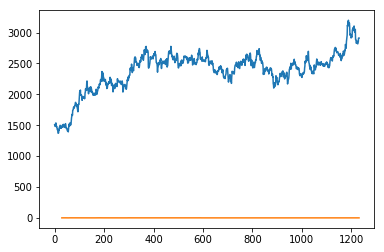

In [100]:
plt.plot(X1)
plt.plot(X9)
plt.show()

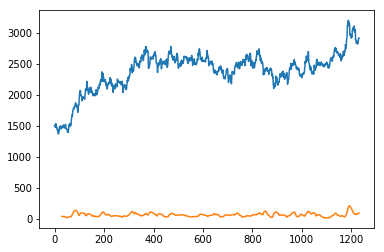

In [101]:
plt.plot(X1)
plt.plot(X10)
plt.show()

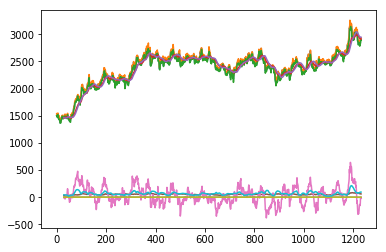

In [98]:
plt.plot(X1)
plt.plot(X2)
plt.plot(X3)
plt.plot(X4)
plt.plot(X5)
plt.plot(X6)
plt.plot(X7)
plt.plot(X8)
plt.plot(X9)
plt.plot(X10)

plt.show()